<a href="https://colab.research.google.com/github/fell100/Machine-Learning/blob/master/3_MLP_BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch 

# Descrição

No último exercício verificamos a limitação em usar um modelo linear para algo mais complexo.

Aqui, sem se preocupar muito com todo o código, vamos verificar o que ocorre quando temos vários elementos organizados em camadas. Isto é, elementos que representam a equação

$y_i = \alpha + \beta X_i$

servindo de entradas para outros. A ideia é que combinações mais complexas possam ser formadas em cada camada.

Mais uma vez, vamos usar dados provenientes da equação 

$y = 3x^2+2x+1$

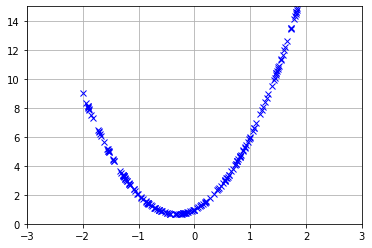

In [18]:
N = 200
# criar o vetor x com N valores entre -2 e 2
x = (np.random.rand(N)*4)-2
#cria o vetor y
y = 3*np.power(x,2)+2*x+1
plt.plot(x,y,'xb')
plt.grid('both')
plt.axis([-3,3,0,15]);

Nesse experimento, vamos fazer algo novo, mas muito usual. Vamos criar os dados e dividi-los em dados de treinamento e teste. 

Isso serve para verificar se o modelo foi capaz de generalizar.

In [19]:
nTreinamento = int(0.7*N) # colocar 70% dos dados para treinamento
x_train = np.array(x[0:nTreinamento],dtype=np.float32)
x_train = x_train.reshape(-1,1)

y_train = np.array(y[0:nTreinamento],dtype=np.float32)
y_train = y_train.reshape(-1,1)

x_test= np.array(x[nTreinamento:],dtype=np.float32)
x_test = x_test.reshape(-1,1)

y_test= np.array(y[nTreinamento:],dtype=np.float32)
y_test = y_test.reshape(-1,1)

nInputs = 1
nHidden = 3
nOutput = 1
learningRate=0.01
model = torch.nn.Sequential(
    torch.nn.Linear(nInputs, nHidden),
    torch.nn.Linear(nHidden, nOutput)
    )  
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)   
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=3, bias=True)
  (1): Linear(in_features=3, out_features=1, bias=True)
)


Você percebeu um novo recurso sendo usado, o Sequential.



```
model = torch.nn.Sequential(
    torch.nn.Linear(nInputs, nHidden),
    torch.nn.Linear(nHidden, nOutput)
    ) 
```

O *Sequential* permite declararmos as operações que serão executadas em sequência. Nesse código, temos uma camada de 1 entrada com 3 saídas que gera 3 valores (equação linear) que serão usados como entradas da próxima camada, que gera uma saída apenas.

Nesse ponto, alguns de vocês devem ter percebido que:
1.   existe algo de estranho nessa estratégia
2.   estamos adicionando camadas e nos aproximando de deep learning.




In [20]:
if torch.cuda.is_available():
  model.cuda()
  print('Ueba! Vamos de GPU')
else:
  print('Ok. Vamos de CPU')

Ok. Vamos de CPU


In [21]:
def train_model(nEpochs = 10):
  errors=[]
  for epoch in range(nEpochs):
    if torch.cuda.is_available():
      inputs = torch.tensor(x_train).to('cuda')
      targets = torch.tensor(y_train).to('cuda')
    else:
      inputs = torch.tensor(x_train) 
      targets = torch.tensor(y_train)    
    # A linha abaixo zera os gradientes calculados anteriormente, para não acumular informações
    optimizer.zero_grad()
    # calculamos a saída da rede
    outputs = model(inputs)
    # calcula o erro
    loss = criterion(outputs, targets)
    # calcula os gradientes
    loss.backward()
    # atualiza parâmetros 
    optimizer.step()
    errors.append(loss.item())
    if(not epoch%100):
      print('Epoch:' + str(epoch) + ' errors: ' + str(loss.item()))
  return errors

errors = train_model(100) 

Epoch:0 errors: 43.712066650390625


Observando o gráfico, percebemos que o erro caiu. Porém, não tanto quanto no exercício anterior.

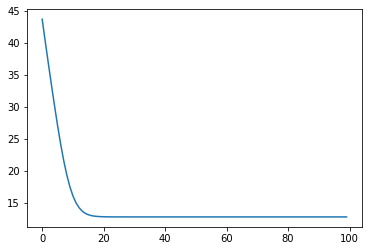

In [22]:
plt.plot(errors)

Podemos verificar a falha plotando o gráfico de x versus a saída do modelo para esses valores.


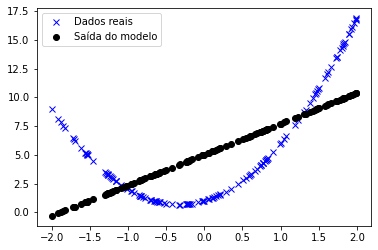

In [23]:
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    entradas = torch.tensor(x_train).to('cuda')
  else:
    entradas = torch.tensor(x_train)
  saidas = model(entradas)

plt.clf()
plt.plot(x_train, y_train, 'xb', label='Dados reais', lw=5)
plt.plot(x_train, saidas, 'ko', label='Saída do modelo')
plt.legend(loc='best')
plt.show()



Como indicado anteriormente, essa estratégia não faz muito sentido pois, colocando mais elementos lineares em cascata, continuamos com uma equação linear.

Aqui entra um ponto crítico das redes neurais: adicionar a não linearidade. Isso pode ser feito, incluindo uma função de ativação não-linear. Vamos trabalhar com a sigmoide.

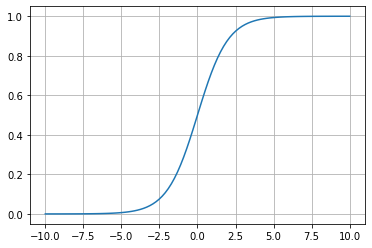

In [24]:
def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))
xt = np.linspace(-10,10,100)
yt = sigmoid(xt)

plt.plot(xt,yt)
plt.grid('both')

Felizmente, não é necessário declarar uma função. O Pytorch já oferece essa e outras funções. Vamos inclui-lá usando *Sequential*

In [25]:
nInputs = 1
nHidden = 4
nOutput = 1
model = torch.nn.Sequential(
    torch.nn.Linear(nInputs, nHidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(nHidden, nOutput)
    )  
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)   
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=4, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=4, out_features=1, bias=True)
)


Por fim, vamos treinar a rede, visualizar os erros e os valores gerados.

Epoch:0 errors: 40.3276481628418
Epoch:100 errors: 13.09768295288086
Epoch:200 errors: 10.121708869934082
Epoch:300 errors: 7.900350570678711
Epoch:400 errors: 6.412769317626953
Epoch:500 errors: 5.385917663574219
Epoch:600 errors: 4.625550746917725
Epoch:700 errors: 4.019202709197998
Epoch:800 errors: 3.510488748550415
Epoch:900 errors: 3.0722155570983887
Epoch:1000 errors: 2.6896255016326904
Epoch:1100 errors: 2.354200839996338
Epoch:1200 errors: 2.060786008834839
Epoch:1300 errors: 1.8055758476257324
Epoch:1400 errors: 1.5849946737289429
Epoch:1500 errors: 1.3953369855880737
Epoch:1600 errors: 1.2328182458877563
Epoch:1700 errors: 1.0937477350234985
Epoch:1800 errors: 0.9746853709220886
Epoch:1900 errors: 0.8725418448448181
Epoch:2000 errors: 0.7846242785453796
Epoch:2100 errors: 0.7086302638053894
Epoch:2200 errors: 0.6426241397857666
Epoch:2300 errors: 0.5849947929382324
Epoch:2400 errors: 0.5344157218933105
Epoch:2500 errors: 0.4898050129413605
Epoch:2600 errors: 0.45028829574584

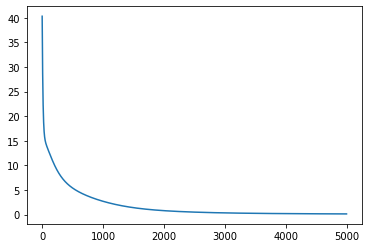

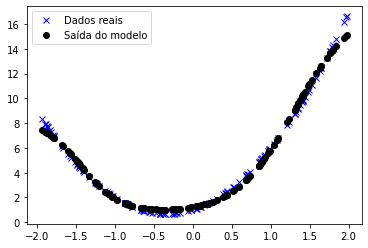

In [ ]:
errors = train_model(5000) 
plt.plot(errors)
plt.show()
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    entradas = torch.tensor(x_train).to('cuda')
  else:
    entradas = torch.tensor(x_train)
  saidas = model(entradas)

plt.clf()
plt.plot(x_train, y_train, 'xb', label='Dados reais', lw=5)
plt.plot(x_train, saidas, 'ko', label='Saída do modelo')
plt.legend(loc='best')
plt.show()

Foi um bom resultado? Para o treinamento, ***talvez***. A rede é inicializada com pesos randômicos e é possível que tenha alcançado um mínimo local em que apenas parte dos dados tenha sido previsto com boa precisão. 

Você deve ter notado também que foram necessárias milhares de épocas para alcançar algo decente. E ainda estamos falando de um problema artificial extremamente simples.

Além disso, é necessário verificar o comportamento para dados não observados.

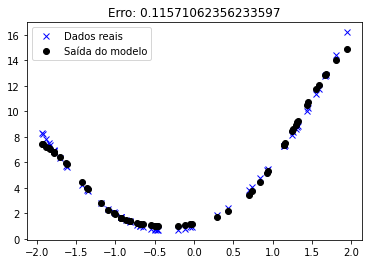

In [ ]:
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    entradas = torch.tensor(x_test).to('cuda')
    targets = torch.tensor(y_test).to('cuda')
  else:
    entradas = torch.tensor(x_test)
    targets = torch.tensor(y_test)
  saidas = model(entradas)

loss = criterion(saidas,targets)
plt.clf()
plt.plot(x_test, y_test, 'xb', label='Dados reais', lw=5)
plt.plot(x_test, saidas, 'ko', label='Saída do modelo')
plt.legend(loc='best')
plt.title('Erro: ' + str(loss.item()))
plt.show()

Durante a preparação deste notbook, o erro para dados desconhecidos foi aceitável. Tenha em mente que, quase sempre, o erro obtido no treinamento será inferior ao erro para dados desconhecidos.
Vá em frente e brinque um pouco. Adicione mais camadas, modifique a taxa de aprendizagem, número de épocas e neurônios nas camadas escondidas.

## **O que vimos**

A abordagem multicamada, incluindo a não linearidade necessária para aproximar uma função.

## **Do Pytorch**
torch.nn.Sequential()

torch.nn.Sigmoid()
